# 9일차 - 250714

## 선형 회귀 그려보기
- 데이터를 직접 생성 (x, y)
- 선형 회귀 모델 학습 (직접 구현 or scikit-learn)
- 예측선 시각화 (matplotlib 사용)


## 설명
| 구성요소                  | 의미 |
|-----------------------|-----|
| np.random.rand        | 0~1 범위의 랜덤 숫자로 입력값 생성 |
| y = 4 + 3x + noise    | 실제 선형식 (기울기 3, 절편 4, 약간의 노이즈 포함) |
| LinearRegression()    | scikit-learn의 회귀 모델 |
| plt.scatter, plt.plot | 실제 점과 예측선을 시각화 |


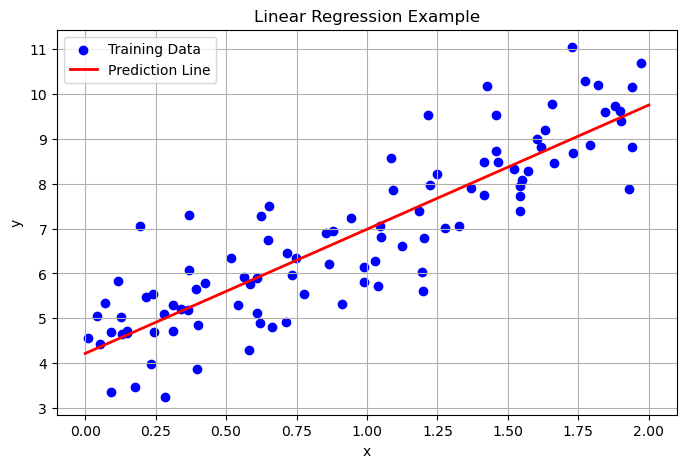

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 가상의 데이터 생성
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + noise

# 2. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)


# 3. 예측선 계산
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# 4. 시각화
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Training Data")
plt.plot(X_new, y_pred, color="red", linewidth=2, label="Prediction Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.grid(True)
plt.show()

# 예제: 다항 회귀 (Polynomial Regression)

이 예제에서는 다음과 같은 함수로부터 데이터를 생성합니다:

$$
y = \sin(2\pi x) + \epsilon
$$

- $$x$$: [0, 1] 구간에서 균등하게 생성된 입력값
- $$\epsilon$$: 평균이 0이고 표준편차가 0.1인 노이즈 (정규분포)
- 목적: 다양한 다항 차수 $$M$$에 대해 회귀 모델을 학습하고, 실제 함수 $$\sin(2\pi x)$$와의 차이를 시각적으로 비교함

비교할 다항 차수: $$M = 0, 1, 3, 9$$

초록 선: 실제 함수 (예: $$\sin(2\pi x)$$)
파란 선: 모델이 학습한 곡선
빨간 점: 샘플 데이터 (노이즈 포함)


## 코드 설명

- `PolynomialFeatures(degree=M)`
  → 입력값 x를 다항식 형태로 확장 (예: x, x², ..., x^M)

- `LinearRegression().fit()`
  → 다항 특성에 대해 선형 회귀 학습

- `model.predict()`
  → 예측 결과 생성

- `scatter`: 빨간 점은 노이즈 포함된 학습 데이터
- `green line`: 실제 정답 함수 $$\sin(2\pi x)$$
- `blue line`: 각 차수 $$M$$에서 학습된 회귀 모델

## 요점 정리

- M=0: 평균값으로만 예측 (수평선)
- M=1: 선형 회귀 (직선)
- M=3: 적절한 곡선, 실제 함수와 유사
- M=9: 과적합 발생 → 데이터에 너무 민감

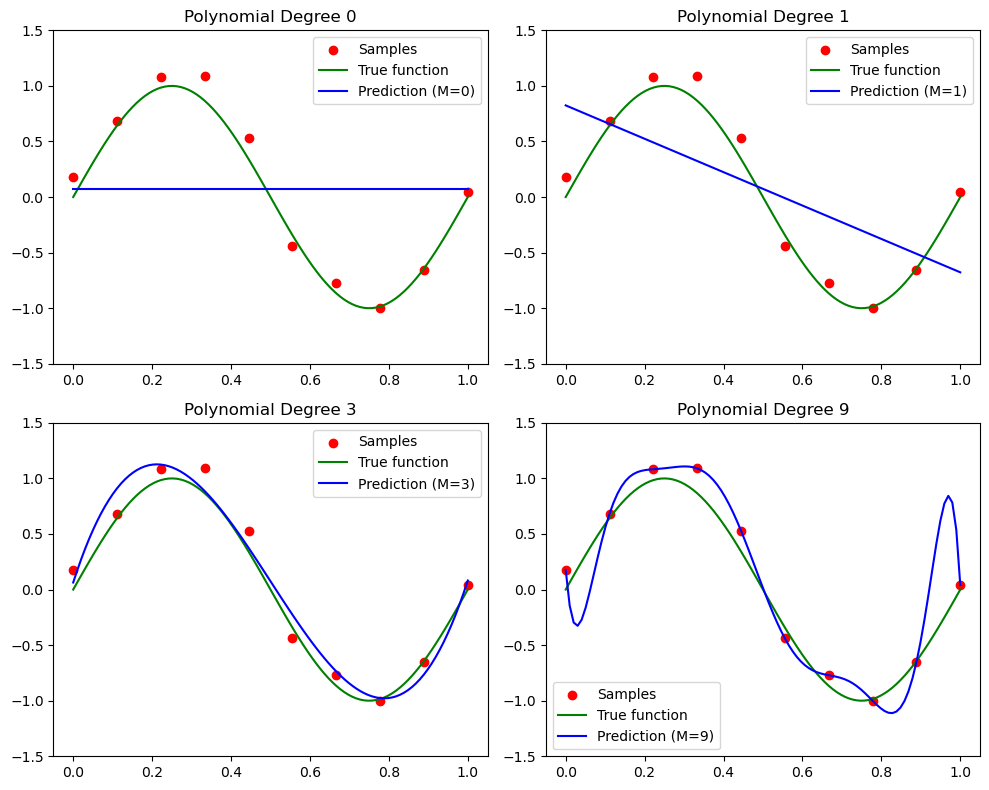

In [3]:
# 필수 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# -----------------------------------
# 1. 데이터 생성
# -----------------------------------

# 재현 가능한 결과를 위해 시드 고정
np.random.seed(0)

# 입력값 x: 0~1 사이의 10개 균등 분포 값
X = np.linspace(0, 1, 10).reshape(-1, 1)  # shape: (10, 1)

# 실제 정답 함수: y = sin(2πx)
y_true = np.sin(2 * np.pi * X).ravel()  # shape: (10,)

# 노이즈를 추가한 관측값 y
y = y_true + np.random.normal(0, 0.1, size=y_true.shape)

# 테스트용 x 구간: 0~1 사이 100개 (부드러운 곡선용)
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_test_true = np.sin(2 * np.pi * X_test)

# -----------------------------------
# 2. 다항 회귀 모델 학습 및 시각화
# -----------------------------------

# 비교할 다항 차수
degrees = [0, 1, 3, 9]

# 2x2 subplot 구성
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, deg in zip(axes.ravel(), degrees):
    # 다항 특성 생성기: [1, x, x^2, ..., x^M]
    poly = PolynomialFeatures(degree=deg)

    # 훈련용 다항 특성 변환
    X_poly = poly.fit_transform(X)

    # 테스트용도 동일하게 변환
    X_test_poly = poly.transform(X_test)

    # 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_poly, y)

    # 예측 수행
    y_pred = model.predict(X_test_poly)

    # 시각화
    ax.scatter(X, y, color='red', label='Samples')                         # 데이터 샘플
    ax.plot(X_test, y_test_true, color='green', label='True function')     # 실제 곡선
    ax.plot(X_test, y_pred, color='blue', label=f'Prediction (M={deg})')   # 모델 예측
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(f'Polynomial Degree {deg}')
    ax.legend()

# 전체 레이아웃 정리
plt.tight_layout()
plt.show()

# 예제 1: Design Matrix 생성(기저 함수 생성)

Design Matrix (설계 행렬) $$ \Phi $$ 는 각 입력 $$ x $$에 대해
기저 함수 $$ \phi_0(x), \phi_1(x), \dots, \phi_M(x) $$를 적용한 결과를 테이블 형태로 구성한 것이다.

예를 들어, 다항 회귀에서
기저 함수 $$ \phi_j(x) = x^j $$ 로 정의하면
$$
\Phi =
\begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^M \\
1 & x_2 & x_2^2 & \dots & x_2^M \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^M
\end{bmatrix}
$$

이 예제에서는:
- 입력값: 5개 샘플 $$x = [0, 1, 2, 3, 4]$$
- 차수 $$M=3$$ → $$[1, x, x^2, x^3]$$ 포함

In [4]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 입력값 x (5개 샘플)
x = np.array([0, 1, 2, 3, 4]).reshape(-1, 1)

# 다항 특성 생성기 (degree 3까지: 1, x, x^2, x^3)
poly = PolynomialFeatures(degree=3, include_bias=True)
Phi = poly.fit_transform(x)

# 결과 출력
print("입력 x:")
print(x.ravel())
print("\nDesign Matrix (Phi):")
print(Phi)

# 특성 이름 확인 (1, x^1, x^2, x^3)
print("\nFeature names:")
print(poly.get_feature_names_out(['x']))

입력 x:
[0 1 2 3 4]

Design Matrix (Phi):
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]

Feature names:
['1' 'x' 'x^2' 'x^3']


# 예제 2: OLS (Ordinary Least Squares) 닫힌 해 공식

앞에서 만든 Design Matrix $$ \Phi $$ 와 타겟 벡터 $$ y $$ 가 주어졌을 때,
OLS 해는 다음 공식으로 계산됩니다:

$$
\mathbf{w}_{opt} = (\Phi^T \Phi)^{-1} \Phi^T \mathbf{y}
$$

이 해는 **오차 제곱합을 최소화하는 가중치 벡터**를 제공합니다.

이 예제에서는:
- 입력 $$x = [0, 1, 2, 3, 4]$$
- 타겟 $$y = [1, 3, 7, 13, 21]$$
- 기저 함수: $$ \phi_j(x) = x^j \ (j = 0, 1, 2) $$ (즉, 다항 차수 2)

예상 결과:
타겟이 $$ y = x^2 + x + 1 $$ 형태이므로
$$ \mathbf{w} = [1, 1, 1] $$ 근사치에 가까워야 함

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 입력값과 타겟값
x = np.array([0, 1, 2, 3, 4]).reshape(-1, 1)
y = np.array([1, 3, 7, 13, 21]).reshape(-1, 1)  # 실제 y = x^2 + x + 1

# 다항 차수 2까지 (bias 포함 → [1, x, x^2])
poly = PolynomialFeatures(degree=2, include_bias=True)
Phi = poly.fit_transform(x)

# OLS 닫힌 해 공식 적용: w = (Phi^T * Phi)^(-1) * Phi^T * y
Phi_T = Phi.T
w_opt = np.linalg.inv(Phi_T @ Phi) @ Phi_T @ y

# 결과 출력
print("Design Matrix (Phi):")
print(Phi)
print("\nTarget y:")
print(y.ravel())
print("\nOLS 해 w_opt:")
print(w_opt.ravel())

# 특성 이름
print("\nFeature names:")
print(poly.get_feature_names_out(['x']))

Design Matrix (Phi):
[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]

Target y:
[ 1  3  7 13 21]

OLS 해 w_opt:
[1. 1. 1.]

Feature names:
['1' 'x' 'x^2']


# 예제 3: One-hot Encoding (범주형 변수 처리)

범주형 변수(categorical variable)는 숫자가 아닌 값(예: 브랜드, 국가 등)으로 되어 있어 그대로는 수학 계산에 사용할 수 없습니다.

이를 벡터로 변환하기 위해 **One-hot Encoding** 을 사용합니다.

예시 입력값:
$$
x = \{ \text{BMW}, \text{Mercedes}, \text{Porsche}, \text{Ferrari}, \text{Lamborghini} \}
$$

→ One-hot 인코딩 결과:

| 브랜드        | 인코딩 결과         |
|---------------|----------------------|
| BMW           | [1, 0, 0, 0, 0]       |
| Mercedes      | [0, 1, 0, 0, 0]       |
| Porsche       | [0, 0, 1, 0, 0]       |
| Ferrari       | [0, 0, 0, 1, 0]       |
| Lamborghini   | [0, 0, 0, 0, 1]       |

주의:
- One-hot은 **서열이 없는 순수 범주형 변수(nominal)** 에 적합
- **차원의 저주(curse of dimensionality)** 를 유발할 수 있음

In [8]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# 입력값: 자동차 브랜드 (2차원 배열로 reshape 필요)
brands = np.array(['BMW', 'Mercedes', 'Porsche', 'Ferrari', 'Lamborghini']).reshape(-1, 1)

# One-hot 인코더 생성 및 적용
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(brands)

# 결과 출력
print("입력값 (브랜드):")
print(brands.ravel())
print("\nOne-hot 인코딩 결과:")
print(encoded)

# 특성 이름 출력
print("\nOne-hot Feature Names:")
print(encoder.get_feature_names_out(['brand']))

입력값 (브랜드):
['BMW' 'Mercedes' 'Porsche' 'Ferrari' 'Lamborghini']

One-hot 인코딩 결과:
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]

One-hot Feature Names:
['brand_BMW' 'brand_Ferrari' 'brand_Lamborghini' 'brand_Mercedes'
 'brand_Porsche']


# 예제 4: Ordinal Encoding (서열형 변수)

Ordinal 변수(서열형 변수)는 명확한 순서가 있지만, 숫자 간의 간격은 일정하지 않을 수 있습니다.

예시:
$$
x = \{ \text{Bad}, \text{Neutral}, \text{Good} \}
$$

이 경우 단순한 one-hot 인코딩보다 **Ordinal Encoding (정수 인코딩)** 이 더 적합합니다.

예상 매핑:
- Bad → 0
- Neutral → 1
- Good → 2

단점:
- 모델이 이 숫자를 "연속적 수치값"으로 해석할 수 있으므로,
  신중히 적용해야 합니다 (특히 비선형 모델에서는 더 주의)

In [9]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# 입력값: 고객 만족도 (서열형 변수)
satisfaction = np.array(['Bad', 'Neutral', 'Good', 'Bad', 'Good']).reshape(-1, 1)

# Ordinal Encoder 정의 및 적용
encoder = OrdinalEncoder(categories=[['Bad', 'Neutral', 'Good']])  # 명시적 순서 지정
encoded = encoder.fit_transform(satisfaction)

# 결과 출력
print("입력값 (서열형):")
print(satisfaction.ravel())
print("\nOrdinal 인코딩 결과:")
print(encoded.ravel())

입력값 (서열형):
['Bad' 'Neutral' 'Good' 'Bad' 'Good']

Ordinal 인코딩 결과:
[0. 1. 2. 0. 2.]


# 예제 5: 범주형 변수 포함 선형 회귀 모델 학습

이번 예제에서는 범주형(One-hot), 서열형(Ordinal) 변수를 포함한 테이블 데이터를 설계 행렬로 구성하고,
이를 이용해 **선형 회귀 모델**을 학습합니다.

### 📋 구성 변수

- 브랜드 (범주형): ['BMW', 'Mercedes', 'Porsche']
- 만족도 (서열형): ['Bad', 'Neutral', 'Good']
- 주행거리 (수치형): [10000, 20000, 30000, ...]
- 가격 (타겟값, y): [단위: 만 원]

---

### 목적
- 범주형 변수 → One-hot 인코딩
- 서열형 변수 → Ordinal 인코딩
- 수치형 변수는 그대로 사용

모든 특성을 통합하여 하나의 Design Matrix로 구성 후, OLS 회귀를 수행

In [10]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import pandas as pd

# 예제 데이터프레임 구성
data = pd.DataFrame({
    'brand': ['BMW', 'Mercedes', 'Porsche', 'BMW', 'Mercedes'],
    'satisfaction': ['Good', 'Neutral', 'Bad', 'Bad', 'Good'],
    'mileage': [10000, 20000, 30000, 40000, 50000],  # 수치형
    'price': [5000, 4800, 4600, 4300, 4200]           # 타겟값
})

# 특성과 타겟 분리
X = data[['brand', 'satisfaction', 'mileage']]
y = data['price']

# ColumnTransformer로 인코딩 설정
ct = ColumnTransformer(transformers=[
    ('brand_ohe', OneHotEncoder(sparse_output=False), ['brand']),
    ('satis_ord', OrdinalEncoder(categories=[['Bad', 'Neutral', 'Good']]), ['satisfaction']),
    ('pass', 'passthrough', ['mileage'])  # 그대로 통과
])

# 파이프라인 구성: 인코딩 + 선형회귀
model = make_pipeline(ct, LinearRegression())

# 학습
model.fit(X, y)

# 계수 확인
reg = model.named_steps['linearregression']
features = model.named_steps['columntransformer'].get_feature_names_out()
for name, coef in zip(features, reg.coef_):
    print(f"{name}: {coef:.2f}")

# 예측
new_input = pd.DataFrame({
    'brand': ['Porsche'],
    'satisfaction': ['Neutral'],
    'mileage': [25000]
})
predicted_price = model.predict(new_input)
print("\n예측 가격 (만 원):", predicted_price[0])

brand_ohe__brand_BMW: -44.44
brand_ohe__brand_Mercedes: -0.00
brand_ohe__brand_Porsche: 44.44
satis_ord__satisfaction: 33.33
pass__mileage: -0.02

예측 가격 (만 원): 4738.888888888889


# 예제 6: OLS 해 vs Gradient Descent 해 비교

## 1️⃣ Closed-form (정해진 해)
정규 방정식을 통해 가중치를 직접 구하는 방식:

$$
\mathbf{w}_{opt} = (\Phi^T \Phi)^{-1} \Phi^T \mathbf{y}
$$

- 장점: 수학적으로 정확한 해
- 단점: 고차원에서는 역행렬 계산이 느림, 불안정할 수 있음

## 2️⃣ Gradient Descent (수치 최적화)
비용 함수의 기울기를 따라 점진적으로 $$ \mathbf{w} $$ 를 업데이트:

$$
\mathbf{w} := \mathbf{w} - \eta \cdot \nabla J(\mathbf{w})
$$

- 장점: 큰 데이터셋이나 차원에서도 적용 가능
- 단점: 학습률 설정에 민감, 수렴 시간 필요

---

이번 예제에서는 다음 문제를 해결해봅니다:

- $$x = [1, 2, 3, 4, 5]$$
- $$y = [3, 5, 7, 9, 11]$$ → 사실상 $$y = 2x + 1$$

In [11]:
import numpy as np

# 입력 및 타겟
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([3, 5, 7, 9, 11]).reshape(-1, 1)

# 다항 특성 생성: [1, x]
X = np.hstack([np.ones_like(x), x])  # Design Matrix: [1, x]

# --------------------------------
# 1. Closed-form Solution
# --------------------------------
w_closed = np.linalg.inv(X.T @ X) @ X.T @ y

# --------------------------------
# 2. Gradient Descent
# --------------------------------
w_gd = np.zeros((2, 1))  # 초기값 [0, 0]
eta = 0.01               # 학습률
epochs = 1000

for i in range(epochs):
    gradient = -2 * X.T @ (y - X @ w_gd) / len(x)
    w_gd = w_gd - eta * gradient

# --------------------------------
# 결과 비교
# --------------------------------
print("Closed-form 해:")
print(w_closed.ravel())

print("\nGradient Descent 해:")
print(w_gd.ravel())

# 예측 비교
x_test = np.array([[6]])
X_test = np.hstack([np.ones((1, 1)), x_test])
y_closed_pred = X_test @ w_closed
y_gd_pred = X_test @ w_gd
print("\n입력 x=6에 대한 예측 (Closed-form):", y_closed_pred[0][0])
print("입력 x=6에 대한 예측 (GD):", y_gd_pred[0][0])

Closed-form 해:
[1. 2.]

Gradient Descent 해:
[0.98598987 2.00388058]

입력 x=6에 대한 예측 (Closed-form): 13.00000000000001
입력 x=6에 대한 예측 (GD): 13.009273360495946


# 예제 7: Regularization (정규화)

선형 회귀는 과적합(overfitting)에 취약할 수 있습니다.
이를 방지하기 위해 **정규화 항(패널티 term)** 을 추가합니다.

---

## 🔹 Ridge Regression (L2 정규화)

비용 함수:

$$
J(\mathbf{w}) = \| y - X\mathbf{w} \|^2 + \lambda \| \mathbf{w} \|^2
$$

- 가중치들의 크기 자체를 줄임 → **계수를 0에 가깝게**
- 모든 변수 유지하면서 영향력 축소

---

## 🔸 Lasso Regression (L1 정규화)

비용 함수:

$$
J(\mathbf{w}) = \| y - X\mathbf{w} \|^2 + \lambda \| \mathbf{w} \|_1
$$

- **가중치 중 일부를 0으로 만듦** → 변수 선택 효과

---

이번 예제에서는 간단한 다항 회귀 문제에 대해:

- 과적합이 발생하는 상황(M=15)
- Ridge/Lasso 회귀 적용 결과 비교


| 모델     | 설명 |
|--------|-----|
| Linear | 고차항까지 모두 학습 → 과적합 발생 |
| Ridge  | 고차항 계수를 줄여 곡선 완화 |
| Lasso  | 불필요한 항은 0으로 만들어 간단한 모델 유도 |


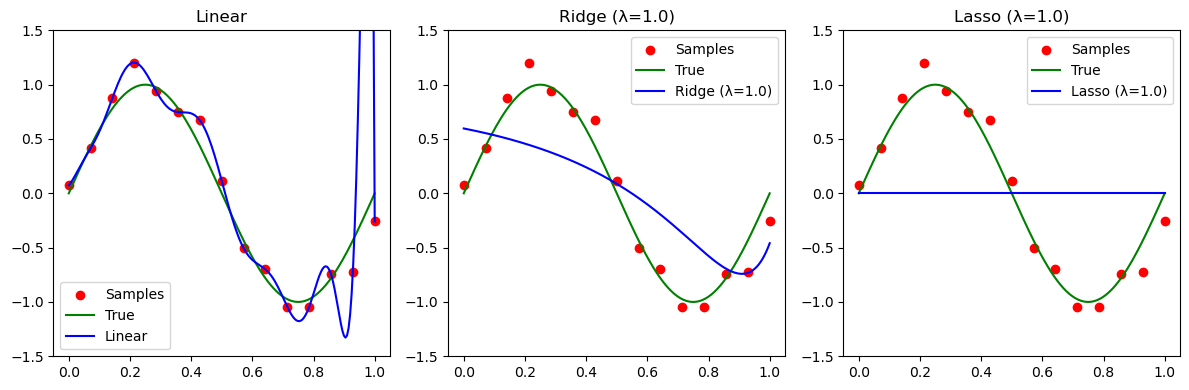

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 데이터 생성: sin 곡선 + 노이즈
np.random.seed(42)
X = np.linspace(0, 1, 15).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.15, size=X.shape[0])

# 테스트용 X
X_test = np.linspace(0, 1, 200).reshape(-1, 1)

# 차수 M=15 (고차 다항식 → 과적합 유도)
degree = 15
lambda_ = 1.0

# 모델 구성
models = {
    "Linear": make_pipeline(PolynomialFeatures(degree), LinearRegression()),
    "Ridge (λ=1.0)": make_pipeline(PolynomialFeatures(degree), Ridge(alpha=lambda_)),
    "Lasso (λ=1.0)": make_pipeline(PolynomialFeatures(degree), Lasso(alpha=lambda_, max_iter=10000))
}

# 시각화
plt.figure(figsize=(12, 4))
for i, (name, model) in enumerate(models.items()):
    model.fit(X, y)
    y_pred = model.predict(X_test)

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='red', label='Samples')
    plt.plot(X_test, np.sin(2 * np.pi * X_test), color='green', label='True')
    plt.plot(X_test, y_pred, color='blue', label=name)
    plt.title(name)
    plt.ylim(-1.5, 1.5)
    plt.legend()

plt.tight_layout()
plt.show()

# 예제 8: 다항 차수 변화에 따른 MSE 시각화

회귀 모델의 복잡도(다항 차수 $$M$$)가 증가하면,
- 훈련 데이터에 대한 오차는 줄어들지만
- 검증 데이터(또는 테스트 데이터)에 대한 오차는 다시 증가할 수 있음

이런 현상을 **과적합(Overfitting)** 이라고 하며,
반대로 너무 단순해서 잘 맞추지 못하면 **과소적합(Underfitting)** 이라 한다.

---

이번 실험에서는:
- 훈련 데이터: 노이즈 포함된 $$ \sin(2\pi x) $$
- 테스트 데이터: 노이즈 없는 $$ \sin(2\pi x) $$
- 다항 차수 $$M = 0$$ 부터 $$M = 15$$ 까지 변화시키며,
  각 경우의 **MSE** 를 측정함

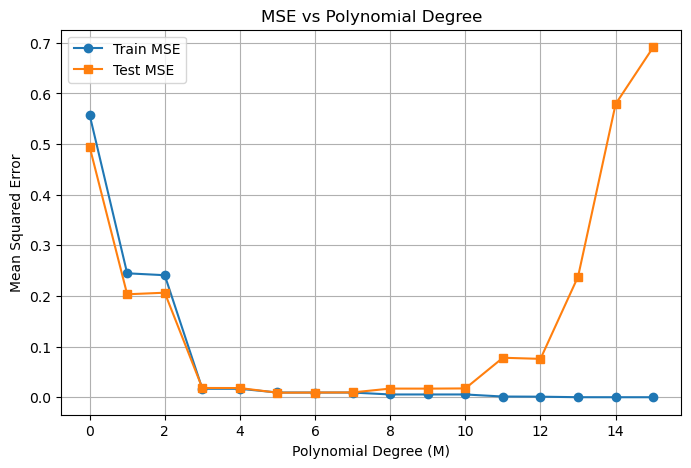

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# 데이터 생성
np.random.seed(42)
n_train = 15
n_test = 100

X_train = np.linspace(0, 1, n_train).reshape(-1, 1)
y_train = np.sin(2 * np.pi * X_train).ravel() + np.random.normal(0, 0.15, n_train)

X_test = np.linspace(0, 1, n_test).reshape(-1, 1)
y_test = np.sin(2 * np.pi * X_test).ravel()

# 다항 차수별 MSE 저장용
max_degree = 15
train_errors = []
test_errors = []

# 반복: 차수 0부터 max_degree까지
for degree in range(max_degree + 1):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(max_degree + 1), train_errors, marker='o', label='Train MSE')
plt.plot(range(max_degree + 1), test_errors, marker='s', label='Test MSE')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

# Leverage Score & R-Squared

---

## 🔷 Leverage Score

### 정의
Leverage Score는 관측치 $$x_i$$가 전체 회귀에 미치는 영향을 측정하는 값입니다.
이는 다음과 같이 정의된 Hat 행렬 $$H$$의 대각 성분입니다:

$$
\hat{\mathbf{y}} = H \mathbf{y}, \quad H = X (X^T X)^{-1} X^T
$$

- $$h_{ii} = \text{row}_i(H) = \text{leverage score of } x_i$$
- Hat 행렬은 대칭(symmetric), idempotent (즉 $$H^2 = H$$)

### 성질
- 모든 leverage score의 합은:
  $$\sum_i h_{ii} = \text{Tr}(H) = p$$
  여기서 $$p$$는 파라미터 수 (또는 설계 행렬의 열 수)
- $$h_{ii}$$ 값이 크다는 건, 해당 관측치 $$x_i$$가 예측값에 강한 영향을 준다는 의미
- 다음처럼 분해 가능:
  $$
  h_{ii} = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{j=1}^n (x_j - \bar{x})^2}
  $$

---

## 🔷 Leverage Score (SVD 관점)

- 설계 행렬 $$X$$의 SVD:
  $$
  X = U \Sigma V^T
  $$

- Hat 행렬은 다음과 같이 표현 가능:
  $$
  H = X (X^T X)^{-1} X^T = U U^T
  $$

- 이로부터 leverage score는 다음과 같이 계산됨:
  $$
  h_{ii} = \| U_i \|^2
  $$

→ 즉, $$U$$ 행렬의 각 행의 L2 노름 제곱

---

## 🔷 Outlier Detection with Leverage

- leverage가 높은 관측치는 예측값을 크게 왜곡할 수 있음

### 일반적으로:
- 평균 leverage:
  $$
  \bar{h} = \frac{p}{n}
  $$
- 관행적으로 다음 조건을 만족하면 이상치로 간주:
  $$
  h_i > 2\bar{h} \quad \text{or} \quad h_i > 3\bar{h}
  $$

> High leverage ≠ 이상치지만, 이상치일 가능성 높음
> 실제 오차(residual)와 함께 확인 필요

---

## 🔷 R-Squared (결정계수)

회귀 모델이 **전체 분산 중 얼마만큼을 설명하는가**를 측정하는 지표

### 정의:

$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

- RSS (Residual Sum of Squares):
  $$
  \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
- TSS (Total Sum of Squares):
  $$
  \sum_{i=1}^{n} (y_i - \bar{y})^2
  $$

### 성질
- $$R^2 = 1$$: 완벽하게 설명
- $$R^2 = 0$$: 아무것도 설명하지 못함
- $$R^2 < 0$$: 모델이 평균보다 못함 (심각한 과적합 또는 엉터리 모델)

> 회귀선과 데이터 분산을 함께 시각화하면 해석에 도움이 됨

---

## 🔍 시각적으로 이해하기

- 점이 회귀선과 가까울수록 RSS가 작아지고, $$R^2$$는 커짐
- 산점도에서 $$R^2$$는 **설명된 분산의 비율**로 나타남

---

# 예제 1: Hat Matrix 계산 및 Leverage Score 시각화

## 목표
- 설계 행렬 $$X$$로부터 Hat Matrix $$H$$ 계산
- $$H$$의 대각 원소 $$h_{ii}$$를 leverage score로 추출
- 각 샘플의 leverage score 시각화

---

## 정의

### Hat Matrix:
$$
H = X (X^T X)^{-1} X^T
$$

### Leverage Score:
$$
h_{ii} = \text{diag}(H)
$$

- 평균 leverage:
$$
\bar{h} = \frac{p}{n}
$$

- leverage가 평균보다 큰 경우, 해당 샘플은 **예측값에 더 큰 영향**을 가짐

Design Matrix X:
[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]

Hat Matrix H:
[[ 0.6  0.4  0.2  0.  -0.2]
 [ 0.4  0.3  0.2  0.1  0. ]
 [ 0.2  0.2  0.2  0.2  0.2]
 [ 0.   0.1  0.2  0.3  0.4]
 [-0.2  0.   0.2  0.4  0.6]]

Leverage Scores:
[0.6 0.3 0.2 0.3 0.6]

평균 leverage (p/n): 0.4


/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


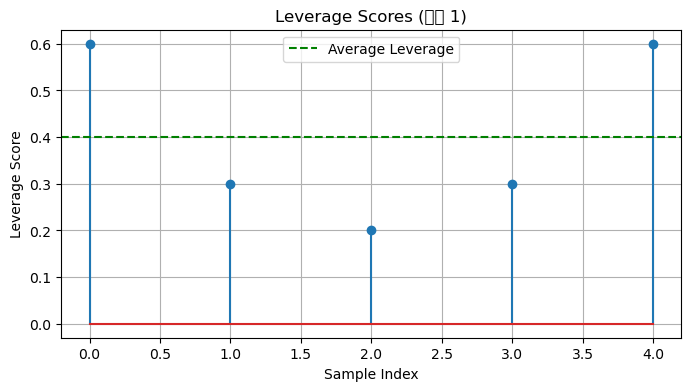

In [18]:
# p = 2 (절편 포함한 변수 2개), n = 5 → 평균 leverage = 2/5 = 0.4
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 정의
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
X = np.hstack([np.ones_like(x), x])  # Design matrix with bias term
n, p = X.shape

# 2. Hat matrix 계산
XtX_inv = np.linalg.inv(X.T @ X)
H = X @ XtX_inv @ X.T

# 3. Leverage score (대각 원소)
leverage_scores = np.diag(H)
h_bar = np.mean(leverage_scores)

# 4. 출력
print("Design Matrix X:")
print(X)
print("\nHat Matrix H:")
print(np.round(H, 3))
print("\nLeverage Scores:")
print(np.round(leverage_scores, 3))
print("\n평균 leverage (p/n):", round(h_bar, 3))

# 5. 시각화
plt.figure(figsize=(8, 4))
plt.stem(range(n), leverage_scores)  # 문제 없이 작동
plt.axhline(h_bar, color='green', linestyle='--', label='Average Leverage')
plt.xlabel('Sample Index')
plt.ylabel('Leverage Score')
plt.title('Leverage Scores (예제 1)')
plt.legend()
plt.grid(True)
plt.show()

# 예제 2: Leverage Score를 활용한 이상치 탐지

## 목표
- Hat Matrix로부터 각 관측치의 leverage score 계산
- 평균 leverage: $$\bar{h} = \frac{p}{n}$$
- 다음 기준을 초과하면 이상치로 판단:
  - $$h_i > 2\bar{h}$$ (관행적인 기준)

---

## 해석
- leverage가 크다는 건 해당 데이터가 회귀선의 모양에 큰 영향을 준다는 뜻
- 단, 오차(residual)가 작으면 반드시 문제는 아님
- → **"influential outlier"** 가 되려면 leverage와 residual 모두 커야 함

/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE 

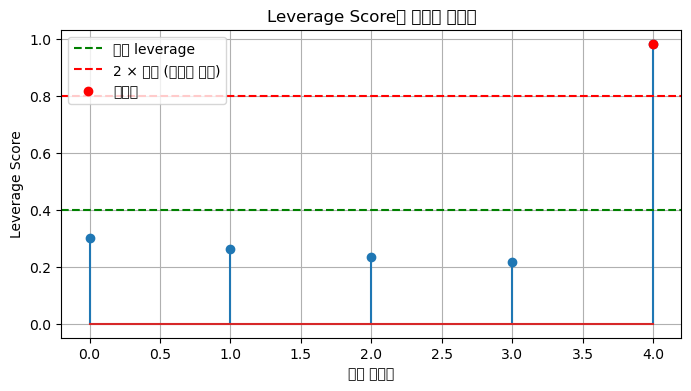

Leverage Scores: [0.3   0.264 0.236 0.216 0.984]
평균 leverage (p/n): 0.4
📌 이상치로 간주된 인덱스: [4]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 정의 (마지막 점은 이상치)
x = np.array([1, 2, 3, 4, 20]).reshape(-1, 1)
X = np.hstack([np.ones_like(x), x])
n, p = X.shape

# 2. Hat matrix 및 leverage 계산
H = X @ np.linalg.inv(X.T @ X) @ X.T
leverage_scores = np.diag(H)
h_bar = p / n

# 3. 이상치 판별 기준
outlier_idx = np.where(leverage_scores > 2 * h_bar)[0]

# 4. 시각화
plt.figure(figsize=(8, 4))
plt.stem(range(n), leverage_scores)  # 문제 없이 작동
plt.axhline(h_bar, color='green', linestyle='--', label='평균 leverage')
plt.axhline(2 * h_bar, color='red', linestyle='--', label='2 × 평균 (이상치 기준)')
plt.scatter(outlier_idx, leverage_scores[outlier_idx], color='red', zorder=5, label='이상치')
plt.title('Leverage Score와 이상치 기준선')
plt.xlabel('샘플 인덱스')
plt.ylabel('Leverage Score')
plt.legend()
plt.grid(True)
plt.show()

# 5. 결과 출력
print("Leverage Scores:", np.round(leverage_scores, 3))
print("평균 leverage (p/n):", round(h_bar, 3))
print("📌 이상치로 간주된 인덱스:", outlier_idx)

# 📊 Data Imputation (결측치 대체)

---

## 1. Mean / Median Imputation

- 각 컬럼의 평균(mean) 또는 중앙값(median)으로 결측치를 대체

**장점**
- 쉽고 빠름
- 수치형 데이터에 유효

**단점**
- 변수 간 상관관계를 고려하지 않음
- 범주형에는 적용 불가
- 평균은 이상치에 민감
- 정확도가 낮을 수 있음

---

## 2. Most Frequent Value Imputation

- 각 컬럼에서 가장 많이 등장한 값(최빈값, mode)으로 결측치 대체

**장점**
- 범주형 데이터에 적합
- 구현이 간단함

**단점**
- 변수 간 상관관계 고려 안 됨
- 데이터 다양성 저해 가능

---

## 3. k-NN Imputation (k-Nearest Neighbors)

- 결측치가 있는 샘플을 k개의 최근접 이웃과 비교하여 값 예측

**알고리즘 요약**
1. 결측치가 있는 행 찾기
2. 결측치 없는 행들과 거리 계산
3. 가장 가까운 k개의 샘플 선택
4. 평균/다수결 등으로 결측치 채움

**장점**
- 평균/중앙값보다 더 정확할 수 있음
- 거리 기반으로 변수 간 관계 반영

**단점**
- 계산 비용 높음
- 스케일링 필요

---

## 4. MICE (Multivariate Imputation by Chained Equations)

- 다변량 회귀 기반 순차적 대체 방식

**작동 방식**
1. 초기값으로 결측치 대체 (예: 평균/중앙값)
2. 다른 변수로 회귀 모델 학습
3. 결측치 예측 및 갱신
4. 이 과정을 반복

**장점**
- 변수 간 상관관계 반영
- 여러 변수 예측에 강력함

**단점**
- 계산 복잡도 높음
- 수렴 보장 안 될 수도 있음

### 📌 1. Mean / Median Imputation (평균/중앙값 대체)

결측치를 컬럼의 평균 또는 중앙값으로 대체합니다.

#### ✅ 장점
- 간단하고 빠르며 수치형에 적합

#### ⚠️ 단점
- 변수 간 관계 무시, 이상치에 민감

In [20]:
import pandas as pd
import numpy as np

# 예제 데이터
data = {
    'age': [25, 27, np.nan, 35, 29, np.nan, 40],
    'salary': [50000, 54000, 58000, np.nan, 62000, 60000, np.nan]
}
df = pd.DataFrame(data)

print("📂 원본 데이터")
print(df)

# 평균 대체
df_mean = df.copy()
df_mean['age'].fillna(df_mean['age'].mean(), inplace=True)
df_mean['salary'].fillna(df_mean['salary'].mean(), inplace=True)

print("\n✅ 평균으로 결측치 대체한 결과")
print(df_mean)

# 중앙값 대체
df_median = df.copy()
df_median['age'].fillna(df_median['age'].median(), inplace=True)
df_median['salary'].fillna(df_median['salary'].median(), inplace=True)

print("\n✅ 중앙값으로 결측치 대체한 결과")
print(df_median)

📂 원본 데이터
    age   salary
0  25.0  50000.0
1  27.0  54000.0
2   NaN  58000.0
3  35.0      NaN
4  29.0  62000.0
5   NaN  60000.0
6  40.0      NaN

✅ 평균으로 결측치 대체한 결과
    age   salary
0  25.0  50000.0
1  27.0  54000.0
2  31.2  58000.0
3  35.0  56800.0
4  29.0  62000.0
5  31.2  60000.0
6  40.0  56800.0

✅ 중앙값으로 결측치 대체한 결과
    age   salary
0  25.0  50000.0
1  27.0  54000.0
2  29.0  58000.0
3  35.0  58000.0
4  29.0  62000.0
5  29.0  60000.0
6  40.0  58000.0


/var/folders/ss/b36xmfg949g_slyf613lmvhm0000gn/T/ipykernel_25171/795804528.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['age'].fillna(df_mean['age'].mean(), inplace=True)
/var/folders/ss/b36xmfg949g_slyf613lmvhm0000gn/T/ipykernel_25171/795804528.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### 📌 2. Most Frequent Value Imputation (최빈값 대체)_

범주형 또는 수치형 데이터에서 가장 자주 등장한 값으로 결측치를 대체합니다.

#### ✅ 장점
- 범주형에 특히 적합, 간단한 방식

#### ⚠️ 단점
- 데이터 다양성을 해칠 수 있음

In [21]:
data = {
    'gender': ['M', 'F', 'F', 'M', np.nan, 'F', 'M']
}
df = pd.DataFrame(data)

print("📂 원본 데이터")
print(df)

# 최빈값 대체
most_frequent = df['gender'].mode()[0]
df['gender'].fillna(most_frequent, inplace=True)

print("\n✅ 최빈값으로 결측치 대체한 결과")
print(df)

📂 원본 데이터
  gender
0      M
1      F
2      F
3      M
4    NaN
5      F
6      M

✅ 최빈값으로 결측치 대체한 결과
  gender
0      M
1      F
2      F
3      M
4      F
5      F
6      M


/var/folders/ss/b36xmfg949g_slyf613lmvhm0000gn/T/ipykernel_25171/900704071.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(most_frequent, inplace=True)


### 📌 3. k-NN Imputation (K-Nearest Neightbors)

결측치가 있는 샘플을 k개의 가까운 샘플로부터 예측합니다.

#### ✅ 장점
- 변수 간 관계 반영 가능

#### ⚠️ 단점
- 느리고 계산량 많음, 스케일 중요

In [22]:
from sklearn.impute import KNNImputer

# 예제 데이터
data = {
    'age': [25, 27, np.nan, 35, 29, np.nan, 40],
    'salary': [50000, 54000, 58000, np.nan, 62000, 60000, np.nan]
}
df = pd.DataFrame(data)

# k-NN Imputer 적용
imputer = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("📂 k-NN Imputer로 대체한 결과")
print(df_knn.round(1))

📂 k-NN Imputer로 대체한 결과
    age   salary
0  25.0  50000.0
1  27.0  54000.0
2  28.0  58000.0
3  35.0  58000.0
4  29.0  62000.0
5  28.0  60000.0
6  40.0  58000.0


### 📌 4. MICE(Multivariate Imputation by Chained Equations) (다변량 순차 대체)

다른 변수들로 회귀 모델을 만들어 반복적으로 결측치를 예측합니다.

#### ✅ 장점
- 상관관계 반영
- 고급 방식으로 정확도 높음

#### ⚠️ 단점
- 계산 복잡도 높음
- convergence(수렴) 보장 안 됨

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 예제 데이터
data = {
    'age': [25, 27, np.nan, 35, 29, np.nan, 40],
    'salary': [50000, 54000, 58000, np.nan, 62000, 60000, np.nan]
}
df = pd.DataFrame(data)

# MICE 방식 적용
imputer = IterativeImputer(max_iter=10, random_state=0)
df_mice = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("📂 MICE로 대체한 결과")
print(df_mice.round(1))

📂 MICE로 대체한 결과
    age   salary
0  25.0  50000.0
1  27.0  54000.0
2  27.9  58000.0
3  35.0  79057.0
4  29.0  62000.0
5  28.6  60000.0
6  40.0  93891.5
